# 1. Importing the relevant libraries and load the data into the data frame

In [1]:
#For this project we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind
sns.set()
%matplotlib inline

In [2]:
#the dataset is in csv format so we'll use read_csv function in pandas and replace blank space with NaN by "na_values=' ' "
all_data=pd.read_csv('webmd.csv', na_values=' ')

In [3]:
#to display the top 5 rows
all_data.head(5)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,NaN,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,NaN,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,NaN,1


In [4]:
#to display the bottom 5 rows
all_data.tail(5)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,NaN,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,NaN,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1
362805,45-54,Stop Smoking,11/12/2008,chantix,144470,4,5,"One year ago, I tried Chantix and had to stop ...",5,Female,"Nausea , headache , vomiting , drowsiness, g...",3


# 2. Checking the dataset, cleaning and manupulation

Before diving into data analysis it is important to check whether there are missing values, inconsistent formatting, malformed records or nonsensical outliers. Null values checked in the main dataset and after the selecting pain condition the null values needs to be check. Looking at the dataset under consideration, there is no variables that inconsistent formatting and records or nonsensical outliers.

## 2.1 Checking the dataset

In [5]:
#Only some attributes are considered in this project we'll drop attributes that aren't considered.
semi_cleaned_data=all_data.drop(['Date', 'DrugId', 'Reviews', 'Sides', 'UsefulCount'], axis=1)
#Renaming the columns
semi_cleaned_data= semi_cleaned_data.rename(columns={"Satisfaction": "Rating"})
#selecting the rows of our target which is only in pain condition  
semi_cleaned_data=semi_cleaned_data[semi_cleaned_data.Condition.str.contains('Pain', na=False)]

In [6]:
#check the semicleaned data
semi_cleaned_data.describe(include='all')

,Age,Condition,Drug,EaseofUse,Effectiveness,Rating,Sex
count,51744,53649,53649,53649.000000,53649.000000,53649.000000,49951
unique,11,52,635,NaN,NaN,NaN,2
top,45-54,Pain,hydrocodone-acetaminophen,NaN,NaN,NaN,Female
freq,14641,25232,3818,NaN,NaN,NaN,31971
mean,NaN,NaN,NaN,4.154709,3.520084,3.307685,NaN
std,NaN,NaN,NaN,1.192308,1.374853,1.526008,NaN
min,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,4.000000,3.000000,2.000000,NaN
50%,NaN,NaN,NaN,5.000000,4.000000,4.000000,NaN
75%,NaN,NaN,NaN,5.000000,5.000000,5.000000,NaN


In [7]:
#looking at the count of each attributes there is a difference between each features which indicates that there are null values in semiclean_data
#Check if null values exist in the dataset
print('Do null values exist in the dataset? ' + str(semi_cleaned_data.isnull().values.any()))
#if null values exist calculate the total null vaues in each column:
semi_cleaned_data.isna().sum()

Do null values exist in the dataset? True


Age              1905
Condition           0
Drug                0
EaseofUse           0
Effectiveness       0
Rating              0
Sex              3698
dtype: int64

In [8]:
#since Age and Sex are the determining variable through out this project, they cant be null, 
#hence drop the null values from data set.
clean_data=semi_cleaned_data.dropna(axis=0)

#Check if null values exist in the dataset
print('Do null values exist in the dataset? ' + str(clean_data.isnull().values.any()))

#check the number of features and rows of remaining data
print("Dataset contains: " + str(clean_data.shape[0]) + " rows and " + str(clean_data.shape[1]) + " columns")

#datatype of each attributes of cleaned data
clean_data.info()

Do null values exist in the dataset? False
Dataset contains: 49313 rows and 7 columns
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49313 entries, 186 to 361615
Data columns (total 7 columns):
Age              49313 non-null object
Condition        49313 non-null object
Drug             49313 non-null object
EaseofUse        49313 non-null int64
Effectiveness    49313 non-null int64
Rating           49313 non-null int64
Sex              49313 non-null object
dtypes: int64(3), object(4)
memory usage: 3.0+ MB


In [9]:
#check the cleaned data
clean_data.describe(include='all')

,Age,Condition,Drug,EaseofUse,Effectiveness,Rating,Sex
count,49313,49313,49313,49313.000000,49313.000000,49313.000000,49313
unique,11,50,606,NaN,NaN,NaN,2
top,45-54,Pain,hydrocodone-acetaminophen,NaN,NaN,NaN,Female
freq,13966,23355,3504,NaN,NaN,NaN,31570
mean,NaN,NaN,NaN,4.184312,3.528502,3.314461,NaN
std,NaN,NaN,NaN,1.171252,1.370462,1.524398,NaN
min,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,4.000000,3.000000,2.000000,NaN
50%,NaN,NaN,NaN,5.000000,4.000000,4.000000,NaN
75%,NaN,NaN,NaN,5.000000,5.000000,5.000000,NaN


Looking the cleaned data description, the total unique of Drug is 606 and the Condition is 50 although all under the condition of PAIN. However, this unique entries of categorical variable such as Drug and CondHowever, this unique entries of categorical variable such as Drug and Condition are too much to implement and a regression will be hard because there will be more than 650 dummies.ition are too much to implement and a regression will be hard because there will be more than 650 dummies. But we'll deal with it later in regression chapter.
The mean, min, maximum and other properties of numerical features are look correct which means we dont have any outliers. 

## 2.2 Data cleaning and manupulation

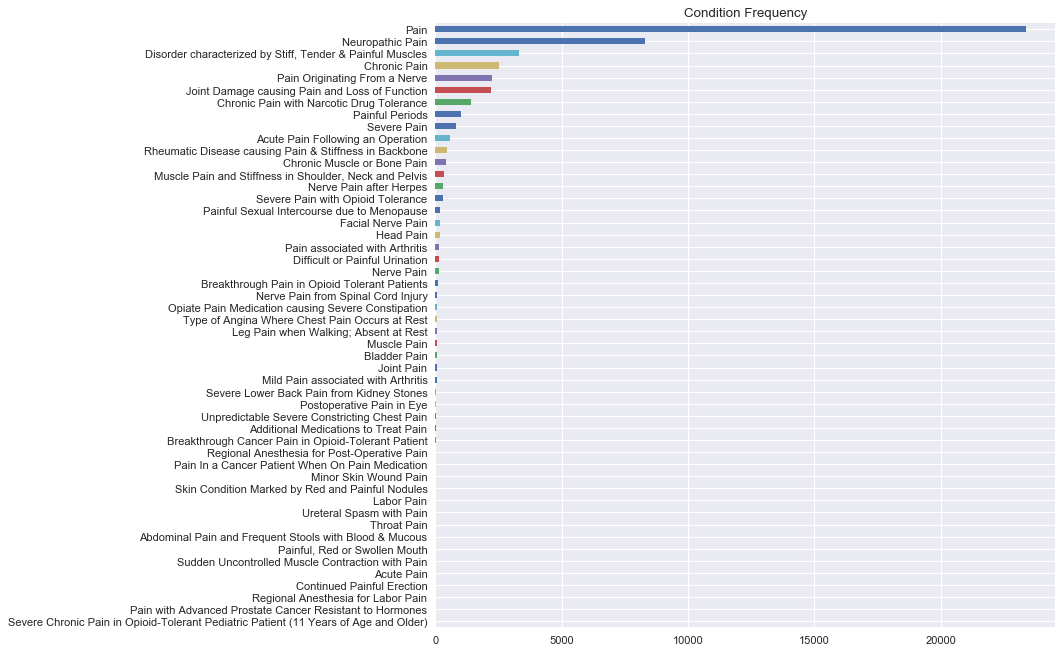

In [10]:
#Let's start with the Condition attribute and plot the frequency of conditions  
plt.figure(figsize=(10,10), dpi= 80)
clean_data.Condition.value_counts().sort_values(ascending=True).plot(kind='barh') 
plt.title('Condition Frequency')
plt.show()

Looking at the plot, the highest frequency is for condition 'Pain' which is very general, vague and not specific. Therefore, we'll get rid the condition with Pain using the drop function.

In [11]:
#it is also fair to consider variables with close frequencies and very common pains in our life 
clean_data1=clean_data[clean_data.Condition.isin(['Chronic Pain','Pain Originating From a Nerve','Joint Damage causing Pain and Loss of Function', 
'Joint Damage causing Pain and Loss of Function','Chronic Pain with Narcotic Drug Tolerance','Painful Periods', 'Severe Pain', 'Acute Pain Following an Operation'])]

In [12]:
clean_data1.describe(include='all')

,Age,Condition,Drug,EaseofUse,Effectiveness,Rating,Sex
count,10774,10774,10774,10774.000000,10774.000000,10774.000000,10774
unique,11,7,291,NaN,NaN,NaN,2
top,45-54,Chronic Pain,oxycontin,NaN,NaN,NaN,Female
freq,3011,2529,1139,NaN,NaN,NaN,7082
mean,NaN,NaN,NaN,4.145164,3.487563,3.261556,NaN
std,NaN,NaN,NaN,1.221841,1.424150,1.579742,NaN
min,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,4.000000,2.000000,2.000000,NaN
50%,NaN,NaN,NaN,5.000000,4.000000,4.000000,NaN
75%,NaN,NaN,NaN,5.000000,5.000000,5.000000,NaN


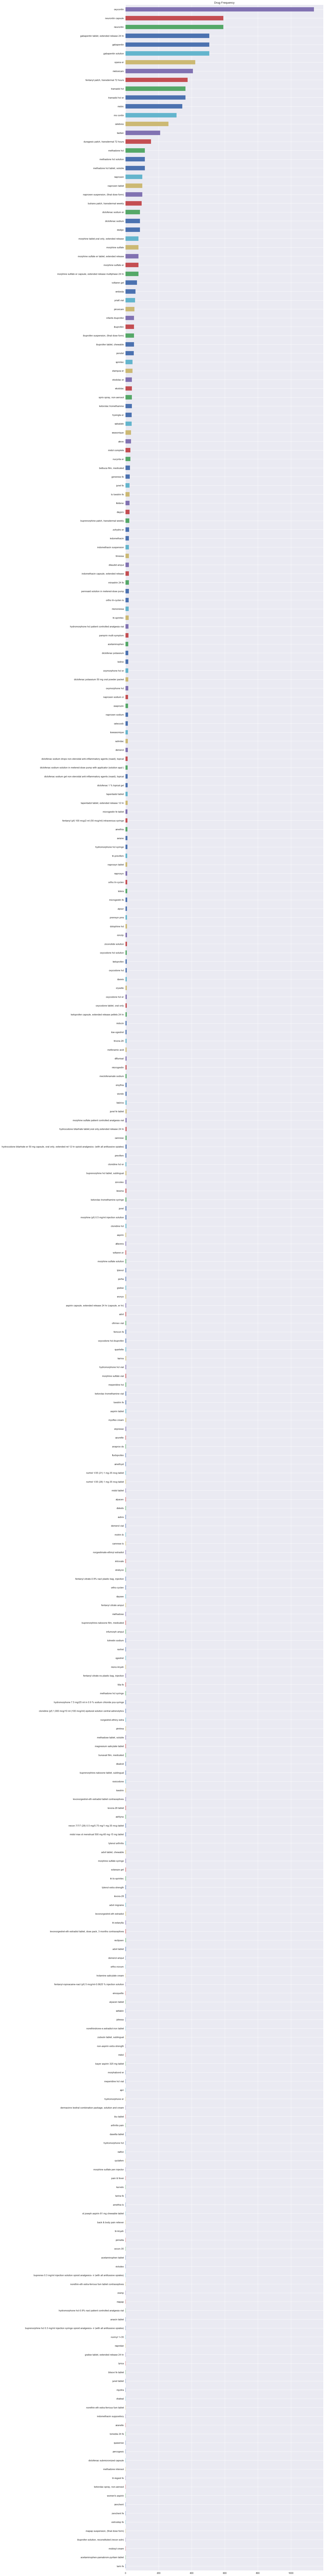

In [13]:
#Let's continue on Drug features. Looking at the description of the above dataset, there are 291 unique drugs used
plt.figure(figsize=(15,200), dpi= 80)
clean_data1.Drug.value_counts().sort_values(ascending=True).plot(kind='barh') 
plt.title('Drug Frequency')
plt.show()

In order to reduce the variables and easily implement we'll consider top ten drugs. From the final cleaned data description, we can note that teh overall datas are 5409, the unique conditions and drugs are 6 and 10 respectively.  

In [14]:
cleaned_data=clean_data1[clean_data1.Drug.isin( ['oxycontin','neurontin capsule','neurontin', 'gabapentin','gabapentin solution',
                                             'gabapentin tablet, extended release 24 hr','opana er', 'meloxicam',
                                              'fentanyl patch, transdermal 72 hours','tramadol hcl'])]
cleaned_data.describe(include='all')

,Age,Condition,Drug,EaseofUse,Effectiveness,Rating,Sex
count,5409,5409,5409,5409.000000,5409.000000,5409.000000,5409
unique,9,6,10,NaN,NaN,NaN,2
top,45-54,Pain Originating From a Nerve,oxycontin,NaN,NaN,NaN,Female
freq,1655,2249,1139,NaN,NaN,NaN,3476
mean,NaN,NaN,NaN,4.101498,3.440747,3.254021,NaN
std,NaN,NaN,NaN,1.229512,1.417952,1.563674,NaN
min,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,4.000000,2.000000,2.000000,NaN
50%,NaN,NaN,NaN,5.000000,4.000000,4.000000,NaN
75%,NaN,NaN,NaN,5.000000,5.000000,5.000000,NaN


# 3 Data Analysis

It is important to visualization the data in a graph to communicate relationships of data with images. We need data visualization maily because visual summary of information makes it easier to identify patterns and trends than looking through thousands of rows. Before considering the relationship between two variables it is important to to summarize information having a single variable. Data analysis that involves the relationship between two different variables is called bivariate data and data that has single or only one variable is known as univariate data. 

### 3.1 Univariate Data Analysis

The variable that does not deal with relationships, but rather it is used to describe something in a dataset the age of the drug users which can be considered as univariate data. Hence, let's see the age demography using value_counts function. As shown in the result the highest and the least number of pain medicine users age range is 45-54 and 3-6 respectively. 

Text(0.5,1,'Age Frequency')

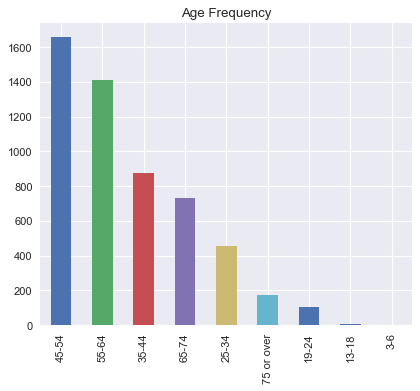

In [15]:
#The visual representation of the aggregated age range using rectangular bars with lengths proportional to the values that they represent. 
plt.figure(figsize=(6,5), dpi= 80)
cleaned_data.Age.value_counts().plot(kind='bar')
plt.title('Age Frequency')

### Devide the aggregated age based on Sex

In order to compare the number (frequency) of Female and Male pain medicine users we plot side-by-side bar plots using subplot function. From the side-by-side rectangular bars with lengths proportional to the values for Female and male plot, it can easily noted that the number of female pain medicine users are higher than male users in all age range. 

Text(0.5,1,'Male Age Frequency')

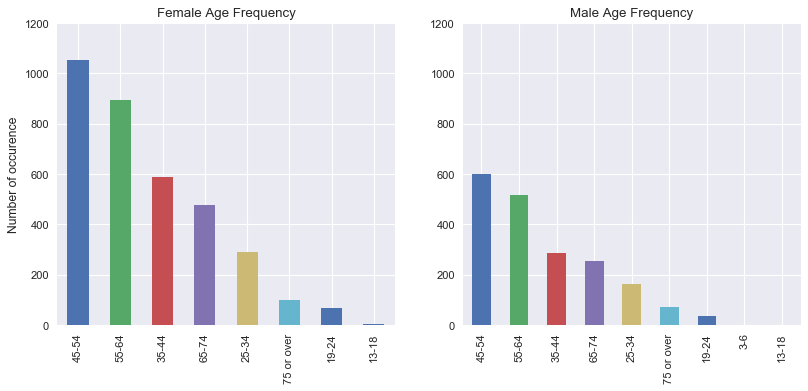

In [16]:
plt.figure(figsize=(12,5), dpi= 80)
plt.subplot(1, 2, 1)
#Extracting female users and plotting the frequency
female_data=cleaned_data[cleaned_data['Sex']=='Female']
female_data.Age.value_counts().plot(kind='bar')
plt.ylim(0,1200)
plt.ylabel('Number of occurence')
plt.title('Female Age Frequency')
plt.subplot(1, 2, 2)
#Extracting male users and plotting the frequency
male_data=cleaned_data[cleaned_data['Sex']=='Male']
male_data.Age.value_counts().plot(kind='bar')
plt.ylim(0,1200)
plt.title('Male Age Frequency')

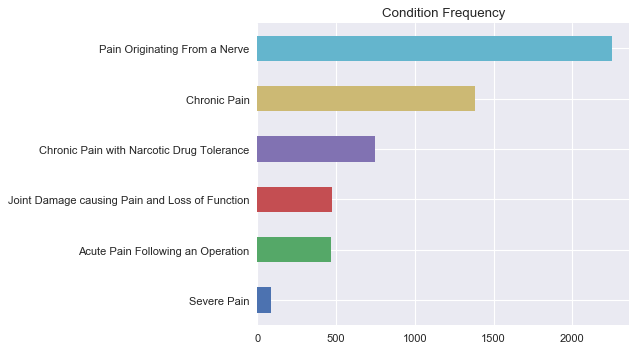

In [17]:
#Visual representation of the frequency of conditions in a cleaned dataset.
plt.figure(figsize=(6,5), dpi= 80)
cleaned_data.Condition.value_counts().sort_values(ascending=True).plot(kind='barh') 
plt.title('Condition Frequency')
plt.show()

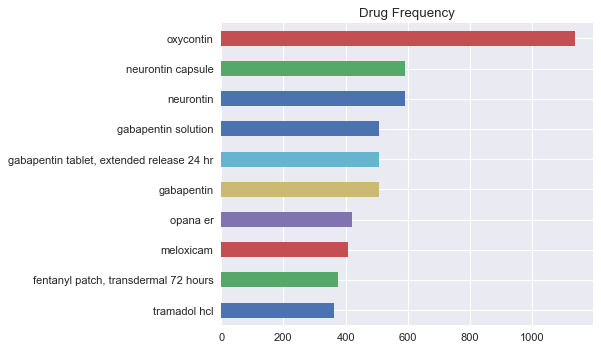

In [18]:
#Visual representation of the frequency of drugs in a cleaned dataset.
plt.figure(figsize=(6,5), dpi= 80)
cleaned_data.Drug.value_counts().sort_values(ascending=True).plot(kind='barh') 
plt.title('Drug Frequency')
plt.show()

## 3.2 Bivariate Data Analysis 

The purpose of bivariate data is to analyze and explain the relationship between two different variables. In this section we examine and present the relationship between the variables in the dataset.

### 3.2.1 Frequency Histogram 

The first bivariate data analysis is the relationship between users age and drug type. Then we separate users age and drug type relationship by users gender for comparison purpose. Before we plot the  

In [19]:
cleaned_data=cleaned_data.replace(to_replace=['0-2','3-6','7-12','13-18','19-24','25-34','35-44','45-54','55-64','65-74','75 or over'],
                                  value=[1,5,10,15,20,30,40,50,60,70,80])

In [20]:
female_data=cleaned_data[cleaned_data['Sex']=='Female']
male_data=cleaned_data[cleaned_data['Sex']=='Male']

Below is the histogram representing the relationship between Age and drugs. Since we have ten drugs, we iterate through using 'for loop' for each drug and plot the histogram using hist function. The bins are uniformly divided with the size of 10 and to difrentiate each bin from one another edgecolor is used. From the drug distribution across age group, we can see that the distribution is closely resembling of Gaussian distribution where the drug frequency increases as the age increases and after attaing the pick at average age 50 it starts to decrease.


Text(29.2778,0.5,'Drug Frequency')

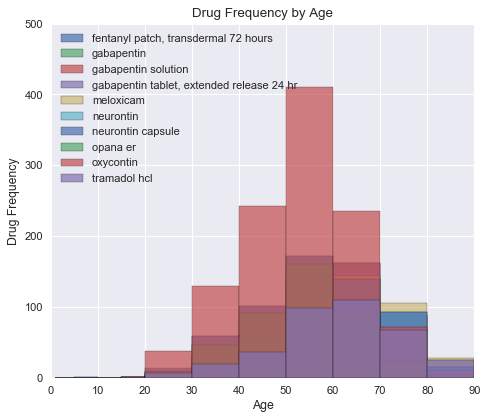

In [21]:
plt.figure(figsize=(6,5),dpi= 80)
bins=[1,5,10,15,20,30,40,50,60,70,80,90]

# Iterate through each drugs
for medicine in cleaned_data.groupby('Drug')['Drug'].count().index:
    subset=cleaned_data[cleaned_data['Drug']==medicine]
    plt.hist(subset['Age'],bins=bins,alpha=0.7, edgecolor='k', label=medicine)
plt.xlim(0,90)
plt.ylim(0,500)
plt.legend()
plt.tight_layout()
plt.legend(loc='upper left')
plt.title('Drug Frequency by Age'); plt.xlabel('Age'); plt.ylabel('Drug Frequency')

Usuing the method above, the distribution of Condition across age group is also ploted. The maximum frequency for condition unlike drug frequency is at age 60 then drops down.    

Text(29.2778,0.5,'Condition Frequency')

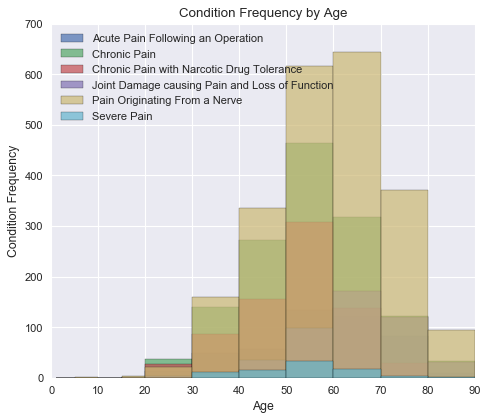

In [22]:
plt.figure(figsize=(6,5),dpi= 80)
bins=[1,5,10,15,20,30,40,50,60,70,80,90]

# Iterate through each drugs
for condition in cleaned_data.groupby('Condition')['Condition'].count().index:
    subset=cleaned_data[cleaned_data['Condition']==condition]
    plt.hist(subset['Age'],bins=bins,alpha=0.7, edgecolor='k', label=condition)
plt.xlim(0,90)
plt.ylim(0,700)
plt.legend()
plt.tight_layout()
plt.legend(loc='upper left')
plt.title('Condition Frequency by Age'); plt.xlabel('Age'); plt.ylabel('Condition Frequency')

The frequency relationship of drug and age for female and male users are analyzed separately. The distribution trend is the similar, in both genders the pick is at the Age of 50.

Text(471.448,0.5,'Drug Frequency')

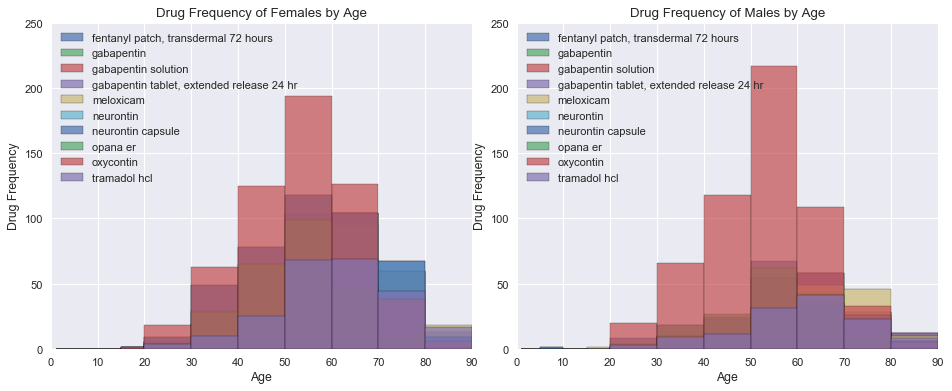

In [23]:
plt.figure(figsize=(12,5),dpi= 80)
bins=[1,5,10,15,20,30,40,50,60,70,80,90]

# Iterate through each drugs
plt.subplot(1,2,1)
for medicine in female_data.groupby('Drug')['Drug'].count().index:
    subset=female_data[female_data['Drug']==medicine]
    plt.hist(subset['Age'],bins=bins,alpha=0.7, edgecolor='k', label=medicine)
plt.xlim(0,90)
plt.ylim(0,250)
plt.legend()
plt.tight_layout()
plt.legend(loc='upper left')
plt.title('Drug Frequency of Females by Age'); plt.xlabel('Age'); plt.ylabel('Drug Frequency')

plt.subplot(1,2,2)
for medicine in male_data.groupby('Drug')['Drug'].count().index:
    subset=male_data[male_data['Drug']==medicine]
    plt.hist(subset['Age'],bins=bins,alpha=0.7, edgecolor='k', label=medicine)
plt.xlim(0,90)
plt.ylim(0,250)
plt.legend()
plt.tight_layout()
plt.legend(loc='upper left')
plt.title('Drug Frequency of Males by Age'); plt.xlabel('Age'); plt.ylabel('Drug Frequency')

We plot the frequency of separate female and male conditions as well. Looking at the plot, the female usres are much more than male users almost all age group. The maximum age group for both gender is between 50 and 70. 

Text(471.51,0.5,'Condition Frequency')

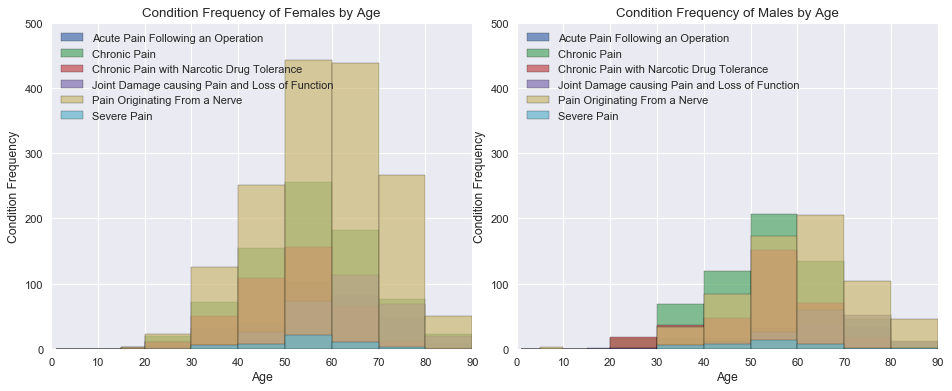

In [24]:
plt.figure(figsize=(12,5),dpi= 80)
bins=[1,5,10,15,20,30,40,50,60,70,80,90]

# Iterate through each drugs
plt.subplot(1,2,1)
for condition in female_data.groupby('Condition')['Condition'].count().index:
    subset=female_data[female_data['Condition']==condition]
    plt.hist(subset['Age'],bins=bins,alpha=0.7, edgecolor='k', label=condition)
plt.xlim(0,90)
plt.ylim(0,500)
plt.legend()
plt.tight_layout()
plt.legend(loc='upper left')
plt.title('Condition Frequency of Females by Age'); plt.xlabel('Age'); plt.ylabel('Condition Frequency')

plt.subplot(1,2,2)
for medicine in male_data.groupby('Condition')['Condition'].count().index:
    subset=male_data[male_data['Condition']==medicine]
    plt.hist(subset['Age'],bins=bins,alpha=0.7, edgecolor='k', label=medicine)
plt.xlim(0,90)
plt.ylim(0,500)
plt.legend()
plt.tight_layout()
plt.legend(loc='upper left')
plt.title('Condition Frequency of Males by Age'); plt.xlabel('Age'); plt.ylabel('Condition Frequency')

### 3.2.2 Probability Histogram

 The other great step in data exploration is to display the probability of variables. This makes it very easy to spot anomalies, such as outliers. The PDF is often the basis on which we decide whether we want to transform a feature. The distribution of both Drug and Conditions including the PDF separate ploted for female and male are similar.

Text(0,0.5,'Drug Probability')

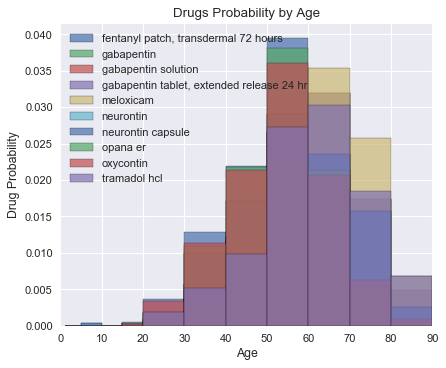

In [25]:
plt.figure(figsize=(6,5),dpi= 80)
bins=[1,5,10,15,20,30,40,50,60,70,80,90]

# Iterate through each drugs
for medicine in cleaned_data.groupby('Drug')['Drug'].count().index:
    subset=cleaned_data[cleaned_data['Drug']==medicine]
    plt.hist(subset['Age'],bins=bins,alpha=0.7, edgecolor='k',density=True, label=medicine)
plt.xlim(0,90)
plt.legend()
plt.legend(loc='upper left')
plt.title('Drugs Probability by Age'); plt.xlabel('Age'); plt.ylabel('Drug Probability')

Text(19.9028,0.5,'Condition Probability')

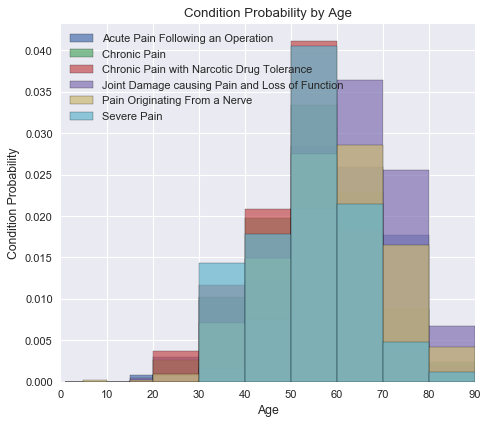

In [26]:
plt.figure(figsize=(6,5),dpi= 80)
bins=[1,5,10,15,20,30,40,50,60,70,80,90]

# Iterate through each drugs
for condition in cleaned_data.groupby('Condition')['Condition'].count().index:
    subset=cleaned_data[cleaned_data['Condition']==condition]
    plt.hist(subset['Age'],bins=bins,alpha=0.7, edgecolor='k', density=True, label=condition)
plt.xlim(0,90)
plt.legend()
plt.tight_layout()
plt.legend(loc='upper left')
plt.title('Condition Probability by Age'); plt.xlabel('Age'); plt.ylabel('Condition Probability')

Text(473.073,0.5,'Drug Probability')

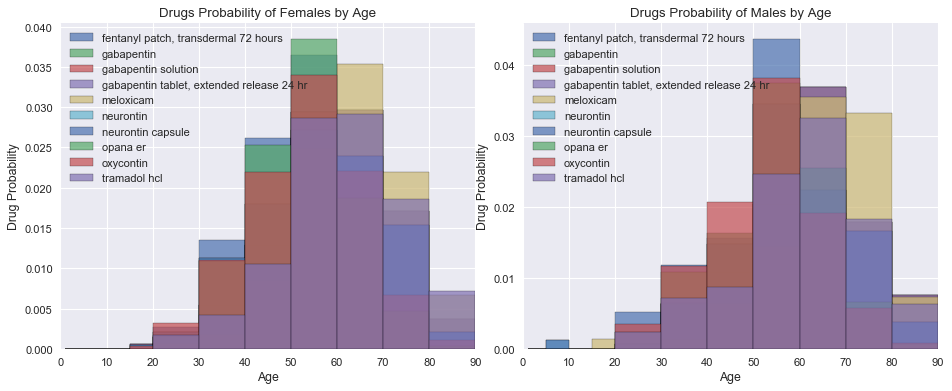

In [27]:
plt.figure(figsize=(12,5),dpi= 80)
bins=[1,5,10,15,20,30,40,50,60,70,80,90]

# Iterate through each drugs
plt.subplot(1,2,1)
for medicine in female_data.groupby('Drug')['Drug'].count().index:
    subset=female_data[female_data['Drug']==medicine]
    plt.hist(subset['Age'],bins=bins,alpha=0.7, edgecolor='k',density=True, label=medicine)
plt.xlim(0,90)
plt.legend()
plt.tight_layout()
plt.legend(loc='upper left')
plt.title('Drugs Probability of Females by Age'); plt.xlabel('Age'); plt.ylabel('Drug Probability')

plt.subplot(1,2,2)
for medicine in male_data.groupby('Drug')['Drug'].count().index:
    subset=male_data[male_data['Drug']==medicine]
    plt.hist(subset['Age'],bins=bins,alpha=0.7, edgecolor='k',density=True, label=medicine)
plt.xlim(0,90)
plt.legend()
plt.tight_layout()
plt.legend(loc='upper left')
plt.title('Drugs Probability of Males by Age'); plt.xlabel('Age'); plt.ylabel('Drug Probability')

Text(473.073,0.5,'Condition Probability')

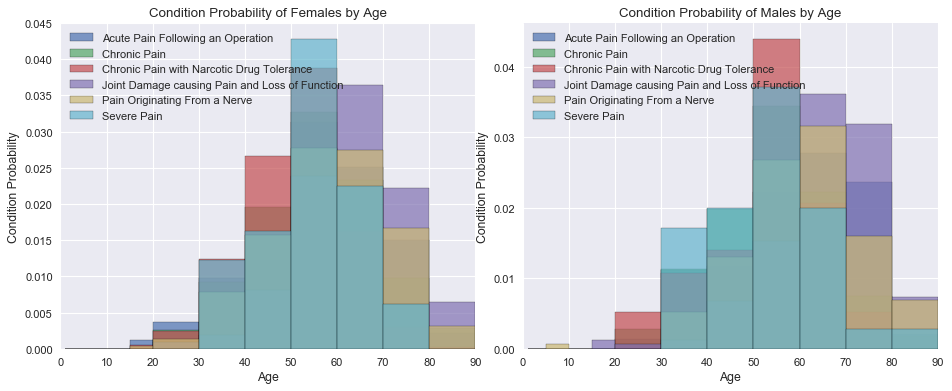

In [28]:
plt.figure(figsize=(12,5),dpi= 80)
bins=[1,5,10,15,20,30,40,50,60,70,80,90]

# Iterate through each drugs
plt.subplot(1,2,1)
for condition in female_data.groupby('Condition')['Condition'].count().index:
    subset=female_data[female_data['Condition']==condition]
    plt.hist(subset['Age'],bins=bins,alpha=0.7, edgecolor='k',density=True, label=condition)
plt.xlim(0,90)
plt.legend()
plt.tight_layout()
plt.legend(loc='upper left')
plt.title('Condition Probability of Females by Age'); plt.xlabel('Age'); plt.ylabel('Condition Probability')

plt.subplot(1,2,2)
for medicine in male_data.groupby('Condition')['Condition'].count().index:
    subset=male_data[male_data['Condition']==medicine]
    plt.hist(subset['Age'],bins=bins,alpha=0.7, edgecolor='k',density=True, label=medicine)
plt.xlim(0,90)
plt.legend()
plt.tight_layout()
plt.legend(loc='upper left')
plt.title('Condition Probability of Males by Age'); plt.xlabel('Age'); plt.ylabel('Condition Probability')

# 4 Effectiveness vs EaseofUse to determine the RATING of the drug 

## 4.1 Relationship between numerical variables

It is always good to start to figure out the relationship between variable before dealing with which variables are more determine the our target variable. We plot the relationship between the variables using scatter matrix in pandas plotting. It is hard to tell about the relationship between the variables from the scatter plot as they are uniform. However, looking at the diagonal histogram the Effectiveness and Rating plot is similar.

C:\Users\wityy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


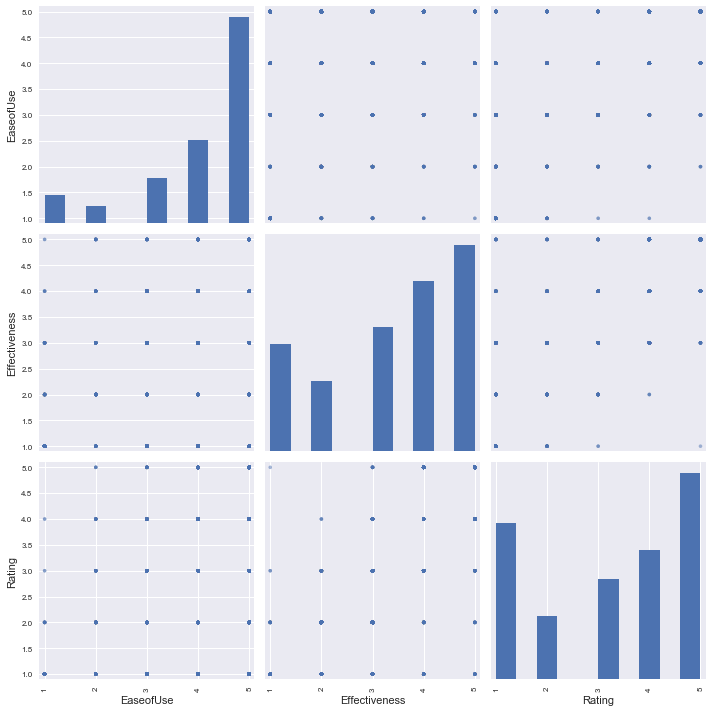

In [29]:
cleaned_data_corr=cleaned_data[['EaseofUse','Effectiveness','Rating']]
from pandas.plotting import scatter_matrix
fig, ax = plt.subplots(figsize=(10,10))
#df_data_corr = df[df['turnover']==1]
scatter_matrix(cleaned_data_corr[['EaseofUse','Effectiveness','Rating']], alpha=0.2, diagonal='hist', ax=ax)
plt.tight_layout()
plt.show()

## 4.2 Investigation of the effect of the two variables on rating using mean value

For further investigation, we compare the means of EaseofUse and Effectivness with Rating for all age group for both Sex. It is again proved that the mean of Effectiveness is much more close to the mean of rating than that of mean of EaseofUse.

In [30]:
#mean of female users
female_mean=female_data.groupby('Age').mean()
female_mean

,EaseofUse,Effectiveness,Rating
Age,,,
15,2.833333,4.500000,4.833333
20,4.328358,3.940299,3.701493
30,3.780069,3.213058,3.013746
40,4.049404,3.459966,3.264055
50,4.068311,3.382353,3.186907
60,4.124161,3.393736,3.191275
70,4.289308,3.538784,3.368973
80,4.490000,3.720000,3.640000


In [31]:
#mean of male users
male_mean=male_data.groupby('Age').mean()
male_mean

,EaseofUse,Effectiveness,Rating
Age,,,
5,1.000000,1.000000,1.000000
15,5.000000,3.000000,1.000000
20,4.210526,4.236842,4.000000
30,4.092025,3.650307,3.380368
40,4.237762,3.674825,3.510490
50,4.073211,3.425957,3.247920
60,4.131783,3.501938,3.312016
70,3.933071,3.125984,2.980315
80,4.250000,3.097222,3.055556


<Figure size 480x400 with 0 Axes>

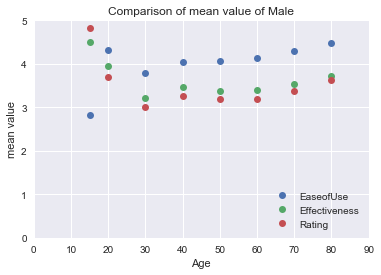

In [32]:
plt.figure(figsize=(6,5), dpi= 80)
female_mean.plot(style='o')
# Plot formatting

plt.xlabel('Age')
plt.ylabel('mean value')
plt.xlim(0,90)
plt.ylim(0,5)
plt.title('Comparison of mean value of Male')
plt.legend(loc='lower right')


<Figure size 480x400 with 0 Axes>

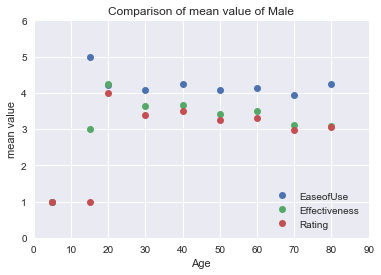

In [33]:
plt.figure(figsize=(6,5), dpi= 80)
male_mean.plot(style='o')
# Plot formatting
plt.xlabel('Age')
plt.ylabel('mean value')
plt.xlim(0,90)
plt.ylim(0,6)
plt.title('Comparison of mean value of Male')
plt.legend(loc='lower right')

# 5. Statical Analysis

## 5.1 Introduction

It is always good to start to figure out the relationship between variable before dealing with which attributes are more determine the our target variable. A good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap using heatmap function of seaborn. In our case we plot the correlation of variables EaseofUse, Effectiveness and Rating. Looking at the plot it the correlation between Effectiveness and Rating is very strong positive correlation than the variables between EaseofUse and Rating. Since the effect of drug differs depending on the gender, we'll treet the female and male users data separately. 

In [34]:
female_data_corr=female_data[['EaseofUse','Effectiveness','Rating']]
corr_female = female_data_corr.corr()
corr_female 

,EaseofUse,Effectiveness,Rating
EaseofUse,1.000000,0.533611,0.556908
Effectiveness,0.533611,1.000000,0.866583
Rating,0.556908,0.866583,1.000000


In [35]:
male_data_corr=male_data[['EaseofUse','Effectiveness','Rating']]
corr_male = male_data_corr.corr()
corr_male

,EaseofUse,Effectiveness,Rating
EaseofUse,1.000000,0.518171,0.537354
Effectiveness,0.518171,1.000000,0.838985
Rating,0.537354,0.838985,1.000000


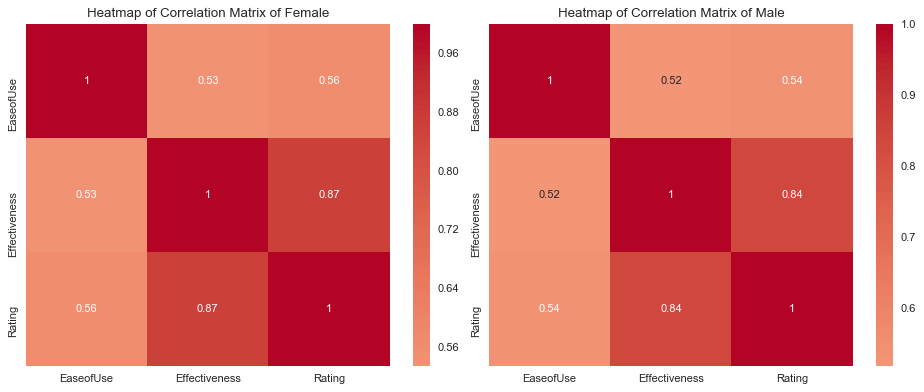

In [36]:
#graphical representation of corellation
plt.figure(figsize=(12,5), dpi= 80)
plt.subplot(1,2,1)
sns.heatmap(corr_female, annot=True,center = 0, cmap = 'coolwarm')
plt.title('Heatmap of Correlation Matrix of Female')
plt.tight_layout()

plt.subplot(1,2,2)
sns.heatmap(corr_male, annot=True,center = 0, cmap = 'coolwarm')
plt.title('Heatmap of Correlation Matrix of Male')
plt.tight_layout()

## 5.2 Formulate a hypothesis

Questions to be answered
1. Does EaseofUse has an impact on Rating or are both correlated?
2. Does Effectiveness has an impact on Rating or are both correlated?
3. Effect of Age and Condition on Drug use

### 5.2.1 Does EaseofUse has an impact on Rating or are both correlated?

Before deep into the evaluation of impact and correlation, we should check the distribution of the attributes. Looking at the frequency distribution of EaseofUs efor both gender, we can easly note that the distribution is not normal. To answer questions of the impact of the variables that pertain to very non-normally distributed data from the real world using the central limit theorem to help us apply frequentist techniques. So method gonna apply to deal with such problem is the Centran Limit Theorem (CLT). Because CLT given a sufficiently large sample size, the sampling distribution of the mean for a variable will approximate a normal distribution regardless of that variable’s distribution in the population.

Text(0.5,1,'Distribution of EaseofUse of Male users')

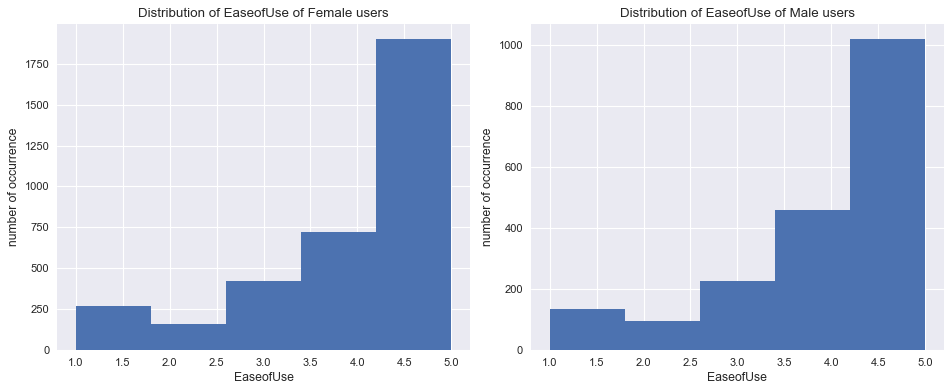

In [37]:
#ploting the EaseofUse ditribution for both gender
female_data_EaseofUse=female_data['EaseofUse']
male_data_EaseofUse=male_data['EaseofUse']
plt.figure(figsize=(12,5), dpi= 80)
plt.subplot(1,2,1)
plt.hist(female_data_EaseofUse, bins=5)
plt.xlabel('EaseofUse')
plt.ylabel('number of occurrence')
plt.tight_layout()
plt.title('Distribution of EaseofUse of Female users')

plt.subplot(1,2,2)
plt.hist(male_data_EaseofUse, bins=5)
plt.xlabel('EaseofUse')
plt.ylabel('number of occurrence')
plt.tight_layout()
plt.title('Distribution of EaseofUse of Male users')

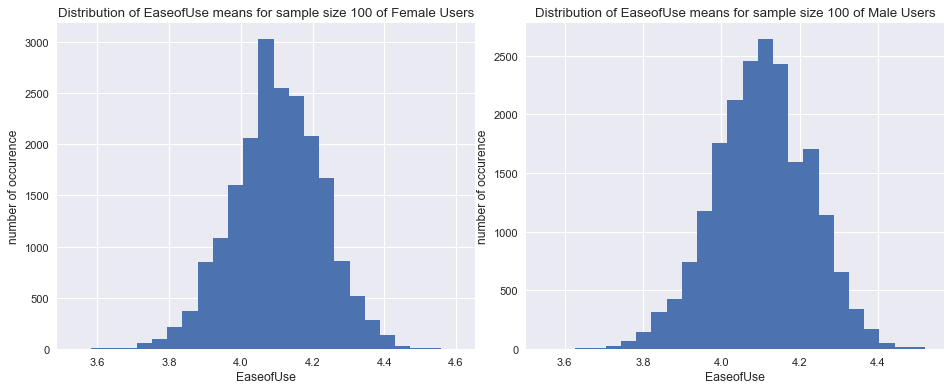

<Figure size 432x288 with 0 Axes>

In [38]:
#sampling the mean of EaseofUse distribution using numpy random choice function and plot the histograms.
from numpy.random import seed
seed(47)
plt.figure(figsize=(12,5), dpi= 80)
plt.subplot(1,2,1)
EaseofUse_mean_dist_female=[np.mean(np.random.choice(female_data_EaseofUse, 100)) for i in range(20000)]
plt.hist(EaseofUse_mean_dist_female, bins=25)
plt.xlabel('EaseofUse')
plt.ylabel('number of occurence')
plt.title('Distribution of EaseofUse means for sample size 100 of Female Users')
plt.tight_layout()

plt.subplot(1,2,2)
EaseofUse_mean_dist_male=[np.mean(np.random.choice(male_data_EaseofUse, 100)) for i in range(20000)]
plt.hist(EaseofUse_mean_dist_male, bins=25)
plt.xlabel('EaseofUse') 
plt.ylabel('number of occurence')
plt.title('Distribution of EaseofUse means for sample size 100 of Male Users')
plt.show()
plt.tight_layout()



Text(0.5,1,'Distribution of Rating of Male users')

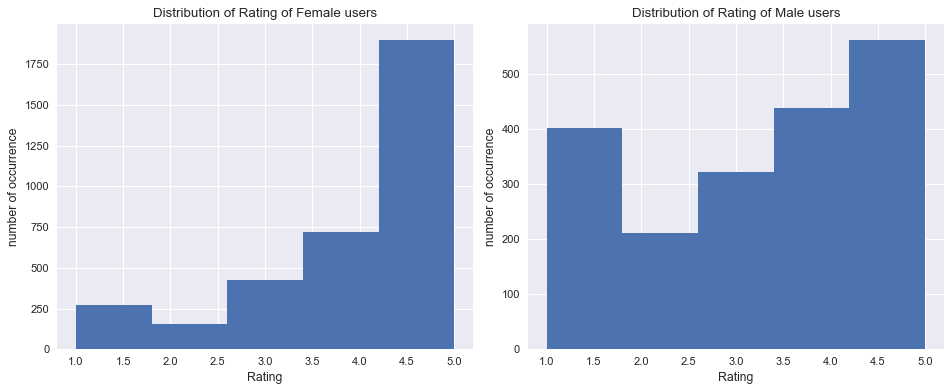

In [39]:
#ploting the Rating ditribution for both gender
female_data_Rating=female_data['Rating']
male_data_Rating=male_data['Rating']
plt.figure(figsize=(12,5), dpi= 80)
plt.subplot(1,2,1)
plt.hist(female_data_EaseofUse, bins=5)
plt.xlabel('Rating')
plt.ylabel('number of occurrence')
plt.tight_layout()
plt.title('Distribution of Rating of Female users')

plt.subplot(1,2,2)
plt.hist(male_data_Rating, bins=5)
plt.xlabel('Rating')
plt.ylabel('number of occurrence')
plt.tight_layout()
plt.title('Distribution of Rating of Male users')

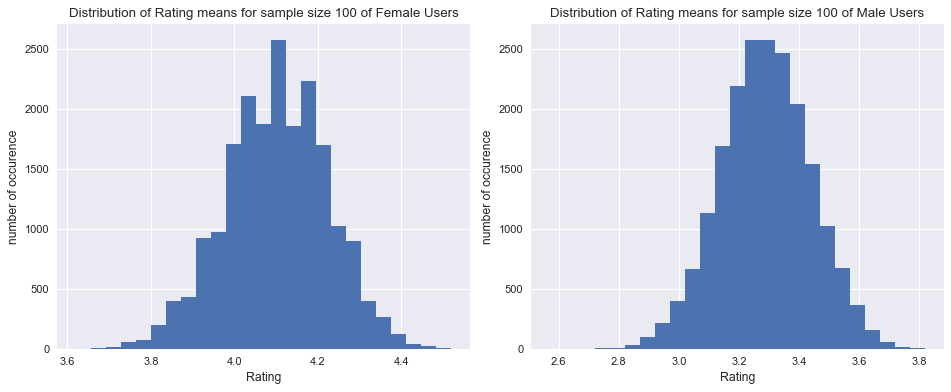

In [40]:
#sampling the mean Rating distribution using numpy random choice function and plot the histograms.
seed(123)
plt.figure(figsize=(12,5), dpi= 80)
plt.subplot(1,2,1)
Rating_mean_dist_female=[np.mean(np.random.choice(female_data_EaseofUse, 100)) for i in range(20000)]
plt.hist(Rating_mean_dist_female, bins=25)
plt.xlabel('Rating')
plt.ylabel('number of occurence')
plt.tight_layout()
plt.title('Distribution of Rating means for sample size 100 of Female Users')

plt.subplot(1,2,2)
Rating_mean_dist_male=[np.mean(np.random.choice(male_data_Rating, 100)) for i in range(20000)]
plt.hist(Rating_mean_dist_male, bins=25)
plt.xlabel('Rating')
plt.ylabel('number of occurence')
plt.tight_layout()
plt.title('Distribution of Rating means for sample size 100 of Male Users')
plt.show()

#### 5.2.1.1 Correlation of EaseofUse and Rating

In [41]:
# correlation of EaseofUse and Rating of female users using pearsonr
from scipy.stats import pearsonr
stat, p = pearsonr(EaseofUse_mean_dist_female, Rating_mean_dist_female)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('EaseofUse and Rating of female users are independent')
else:
	print('EaseofUse and Rating of female users are dependent')

stat=0.002, p=0.830
EaseofUse and Rating of female users are independent


In [42]:
# correlation of EaseofUse and Rating of female users using chi-square
from scipy.stats import chi2_contingency 
table1={'EaseofUse':EaseofUse_mean_dist_female,'Rating':Rating_mean_dist_female}
table_female=pd.DataFrame(table1)
stat, p, dof, expected = chi2_contingency(table_female)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('EaseofUse and Rating of female users are independent')
else:
	print('EaseofUse and Rating of female users are dependent')

stat=74.934, p=1.000
EaseofUse and Rating of female users are independent


In [43]:
# correlation of EaseofUse and Rating of male users using pearsonr
stat, p = pearsonr(EaseofUse_mean_dist_male, Rating_mean_dist_male)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('EaseofUse and Rating of male users are independent')
else:
	print('EaseofUse and Rating of male users are dependent')

stat=-0.002, p=0.771
EaseofUse and Rating of male users are independent


In [44]:
# correlation EaseofUse and Rating of male users using chi-square
table2={'EaseofUse':EaseofUse_mean_dist_male,'Rating':Rating_mean_dist_male}
table_male=pd.DataFrame(table2)
stat, p, dof, expected = chi2_contingency(table_male)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('EaseofUse and Rating of male users are independent')
else:
	print('EaseofUse and Rating of male users are dependent')

stat=109.499, p=1.000
EaseofUse and Rating of male users are independent


#### 5.2.1.2 Hypothesis testing of EaseofUse and Rating

Let's assume that the null hypothesis that EaseofUse impacts the rating i.e the mean of EaseofUse is equal to the mean of Rating.
\begin{equation*}
H_0 = \mu_{EaseofUse} = \mu_{Rating}
\end{equation*}

The alternative hypothesis is the mean of EaseofUse is equal to the mean of Rating.
\begin{equation*}
H_1 = \mu_{EaseofUse} \neq \mu_{Rating}
\end{equation*}

In [45]:
#female users
female_EaseofUse_mean_of_mean = np.mean(EaseofUse_mean_dist_female)
female_Rating_mean_of_mean = np.mean(Rating_mean_dist_female)
print("Female_EaseofUse mean of mean is:",female_EaseofUse_mean_of_mean)
print("Female_Rating mean of mean is:",female_Rating_mean_of_mean)
female_EaseofUse_std = np.std(EaseofUse_mean_dist_female)
female_Rating_std = np.std(Rating_mean_dist_female)
print("Female_EaseofUse std value:",female_EaseofUse_std)
print("Female_Rating std value:",female_Rating_std)
ttest,pval = ttest_ind(EaseofUse_mean_dist_female,Rating_mean_dist_female)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

Female_EaseofUse mean of mean is: 4.1017434999999995
Female_Rating mean of mean is: 4.1004525
Female_EaseofUse std value: 0.12402578444722694
Female_Rating std value: 0.12379660836933296
p-value 0.29748813457399687
we accept null hypothesis


In [46]:
#male users
male_EaseofUse_mean_of_mean = np.mean(EaseofUse_mean_dist_male)
male_Rating_mean_of_mean = np.mean(Rating_mean_dist_male)
print("male_EaseofUse mean value:",male_EaseofUse_mean_of_mean)
print("male_Rating mean value:",male_Rating_mean_of_mean)
male_EaseofUse_std = np.std(EaseofUse_mean_dist_male)
male_Rating_std = np.std(Rating_mean_dist_male)
print("male_EaseofUse std value:",male_EaseofUse_std)
print("male_Rating std value:",male_Rating_std)
ttest,pval = ttest_ind(EaseofUse_mean_dist_male,Rating_mean_dist_male)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

male_EaseofUse mean value: 4.103234
male_Rating mean value: 3.283601
male_EaseofUse std value: 0.12140091121569063
male_Rating std value: 0.15099186335362577
p-value 0.0
we reject null hypothesis


### 5.2.2 Does Effectiveness has an impact on Rating or are both correlated?

Text(0.5,1,'Distribution of Effectiveness of Male users')

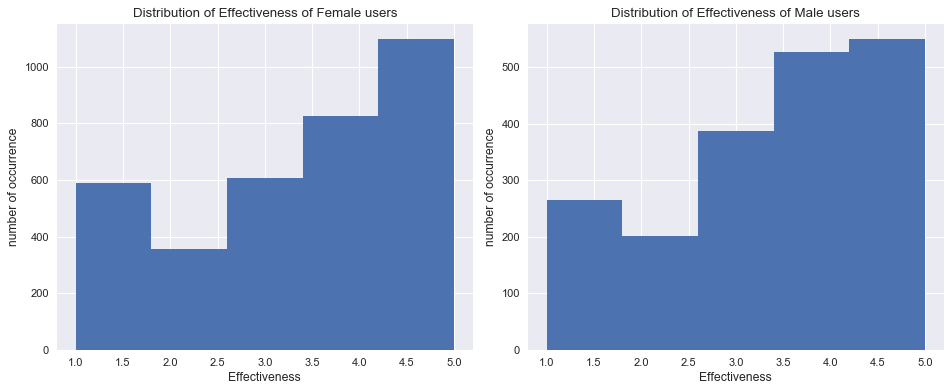

In [47]:
#ploting the Effectiveness ditribution for both gender
female_data_Effectiveness=female_data['Effectiveness']
male_data_Effectiveness=male_data['Effectiveness']
plt.figure(figsize=(12,5), dpi= 80)
plt.subplot(1,2,1)
plt.hist(female_data_Effectiveness, bins=5)
plt.xlabel('Effectiveness')
plt.ylabel('number of occurrence')
plt.tight_layout()
plt.title('Distribution of Effectiveness of Female users')

plt.subplot(1,2,2)
plt.hist(male_data_Effectiveness, bins=5)
plt.xlabel('Effectiveness')
plt.ylabel('number of occurrence')
plt.tight_layout()
plt.title('Distribution of Effectiveness of Male users')

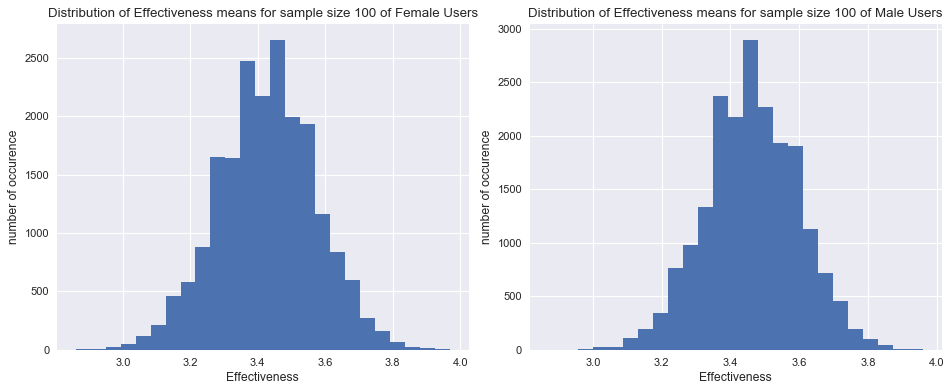

In [48]:
#sampling the mean Effectiveness distribution using numpy random choice function and plot the histograms.
seed(123)
plt.figure(figsize=(12,5), dpi= 80)
plt.subplot(1,2,1)
Effectiveness_mean_dist_female=[np.mean(np.random.choice(female_data_Effectiveness, 100)) for i in range(20000)]
plt.hist(Effectiveness_mean_dist_female, bins=25)
plt.xlabel('Effectiveness')
plt.ylabel('number of occurence')
plt.tight_layout()
plt.title('Distribution of Effectiveness means for sample size 100 of Female Users')

plt.subplot(1,2,2)
Effectiveness_mean_dist_male=[np.mean(np.random.choice(male_data_Effectiveness, 100)) for i in range(20000)]
plt.hist(Effectiveness_mean_dist_male, bins=25)
plt.xlabel('Effectiveness')
plt.ylabel('number of occurence')
plt.tight_layout()
plt.title('Distribution of Effectiveness means for sample size 100 of Male Users')
plt.show()

#### 5.2.2.1 Correlation of Effectiveness and Rating

In [49]:
#female users
stat, p = pearsonr(Effectiveness_mean_dist_female, Rating_mean_dist_female)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Effectiveness and Rating are independent')
else:
	print('Effectiveness and Rating are dependent')

stat=0.530, p=0.000
Effectiveness and Rating are dependent


In [50]:
#male users
stat, p = pearsonr(Effectiveness_mean_dist_male, Rating_mean_dist_male)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Effectiveness and Rating are independent')
else:
	print('Effectiveness and Rating are dependent')

stat=0.841, p=0.000
Effectiveness and Rating are dependent


#### 5.2.2.2 Hypothesis testing of Effectiveness and Rating

Let's assume that the null hypothesis that Effectiveness impacts the rating i.e the mean of Effectiveness is equal to the mean of Rating.
\begin{equation*}
H_0 = \mu_{Effectiveness} = \mu_{Rating}
\end{equation*}

The alternative hypothesis is the mean of EaseofUse is equal to the mean of Rating.
\begin{equation*}
H_1 = \mu_{Effectiveness} \neq \mu_{Rating}
\end{equation*}

In [51]:
#female users
female_Effectiveness_mean_of_mean = np.mean(Effectiveness_mean_dist_female)
print("Female_Effectiveness mean of mean is:",female_Effectiveness_mean_of_mean)
female_Effectiveness_std = np.std(Effectiveness_mean_dist_female)
print("Female_Effectiveness std value:",female_Effectiveness_std)
ttest,pval = ttest_ind(Effectiveness_mean_dist_female,Rating_mean_dist_female)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

Female_Effectiveness mean of mean is: 3.4282364999999997
Female_Effectiveness std value: 0.145442961561397
p-value 0.0
we reject null hypothesis


In [52]:
# male users
male_Effectiveness_mean_of_mean = np.mean(Effectiveness_mean_dist_male)
print("Male_Effectiveness mean of mean is:",male_Effectiveness_mean_of_mean)
male_Effectiveness_std = np.std(Effectiveness_mean_dist_male)
print("Male_Effectiveness std value:",male_Effectiveness_std)
ttest,pval = ttest_ind(Effectiveness_mean_dist_male,Rating_mean_dist_male)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

Male_Effectiveness mean of mean is: 3.4628400000000004
Male_Effectiveness std value: 0.13610512260749041
p-value 0.0
we reject null hypothesis


### 5.2.3 Effect of Age and Condition on Drug use

C:\Users\wityy\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\wityy\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of Age of Male users')

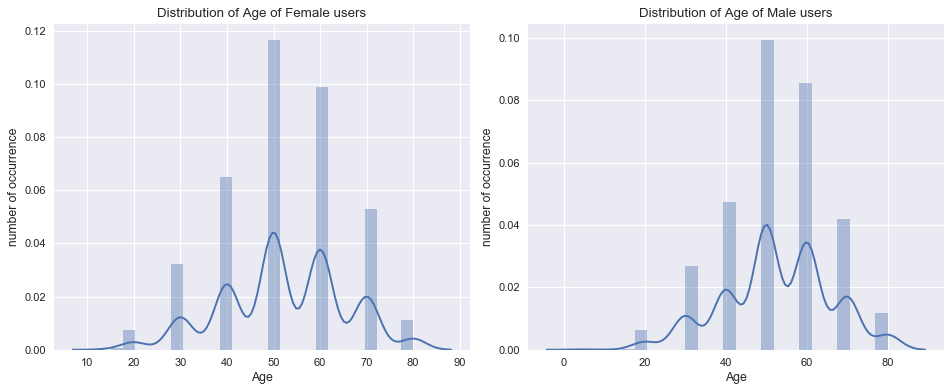

In [53]:
#ploting the Age ditribution for both gender
female_data_Age=female_data['Age']
male_data_Age=male_data['Age']
plt.figure(figsize=(12,5), dpi= 80)
plt.subplot(1,2,1)
sns.distplot(female_data_Age)
plt.xlabel('Age')
plt.ylabel('number of occurrence')
plt.tight_layout()
plt.title('Distribution of Age of Female users')

plt.subplot(1,2,2)
sns.distplot(male_data_Age)
plt.xlabel('Age')
plt.ylabel('number of occurrence')
plt.tight_layout()
plt.title('Distribution of Age of Male users')

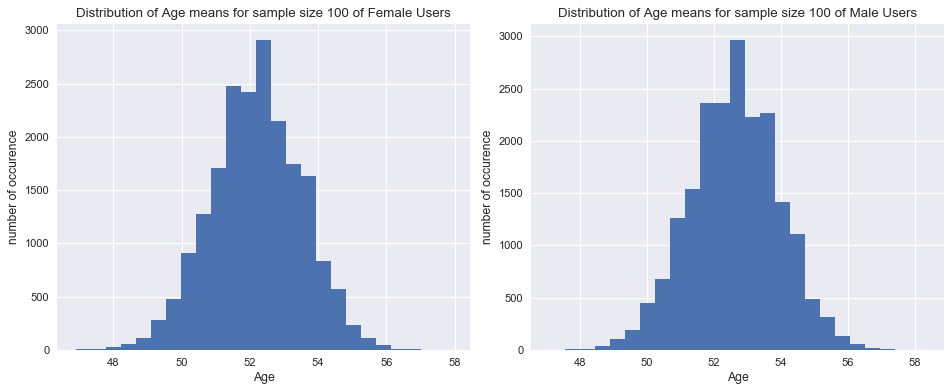

In [54]:
#sampling the mean Age distribution using numpy random choice function and plot the histograms.
seed()
plt.figure(figsize=(12,5), dpi= 80)
plt.subplot(1,2,1)
Age_mean_dist_female=[np.mean(np.random.choice(female_data_Age, 100)) for i in range(20000)]
plt.hist(Age_mean_dist_female, bins=25)
plt.xlabel('Age')
plt.ylabel('number of occurence')
plt.tight_layout()
plt.title('Distribution of Age means for sample size 100 of Female Users')

plt.subplot(1,2,2)
Age_mean_dist_male=[np.mean(np.random.choice(male_data_Age, 100)) for i in range(20000)]
plt.hist(Age_mean_dist_male, bins=25)
plt.xlabel('Age')
plt.ylabel('number of occurence')
plt.tight_layout()
plt.title('Distribution of Age means for sample size 100 of Male Users')
plt.show()

In [55]:
#female users
stat, p = pearsonr(Age_mean_dist_female, Rating_mean_dist_female)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Age and Rating are independent')
else:
	print('Age and Rating are dependent')

stat=0.005, p=0.514
Age and Rating are independent


In [56]:
#female users
female_Age_mean_of_mean = np.mean(Age_mean_dist_female)
print("Female_Age mean of mean is:",female_Age_mean_of_mean)
female_Age_std = np.std(Age_mean_dist_female)
print("Female_Age std value:",female_Age_std)
ttest,pval = ttest_ind(Age_mean_dist_female,Rating_mean_dist_female)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

Female_Age mean of mean is: 52.185604999999995
Female_Age std value: 1.3252498949160494
p-value 0.0
we reject null hypothesis


In [57]:
#male users
male_Age_mean_of_mean = np.mean(Age_mean_dist_male)
print("Male_Age mean of mean is:",male_Age_mean_of_mean)
male_Age_std = np.std(Age_mean_dist_male)
print("Male_Age std value:",male_Age_std)
ttest,pval = ttest_ind(Age_mean_dist_male,Rating_mean_dist_male)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

Male_Age mean of mean is: 52.607522499999995
Male_Age std value: 1.3314888422340423
p-value 0.0
we reject null hypothesis


# 6 Regression Model

### Multicollinearity

Multicollinearity refers to predictors that are correlated with other predictors. Multicollinearity occurs when model includes multiple factors that are correlated not just to the response variable, but also to each other. In other words, it results when we have factors that are a bit redundant. Sklearn does not have a built-in way to check for multicollinearity

In [58]:
# Here's the relevant module
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = cleaned_data[['Age','EaseofUse','Effectiveness']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns
vif

,VIF,Features
0,7.793836,Age
1,14.208353,EaseofUse
2,9.229786,Effectiveness


In [59]:
#Multicollinearity check for female users

variables = female_data[['Age','EaseofUse','Effectiveness']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,8.047793,Age
1,14.109543,EaseofUse
2,8.990865,Effectiveness


In [60]:
#Multicollinearity check for female users

variables = male_data[['Age','EaseofUse','Effectiveness']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,7.382235,Age
1,14.460589,EaseofUse
2,9.701001,Effectiveness


Since EaseofUse and Effectiveness has the highest VIF, I will remove it from the model. beacuse this will drive the VIF of other variables down. 


In [61]:
#data = cleaned_data.drop(['EaseofUse','Effectiveness'],axis=1)

## 6.2 Regression model

### 6.2.1 Create dummy variables

To include the categorical data in the regression, let's create dummies using a very convenient method called: 'get_dummies' which does that seemlessly. It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity.


In [62]:
#decision trees
#random forest

#data_dummies = pd.get_dummies(data, drop_first=True)

In [63]:
#data_dummies.head()

In [64]:
#cleaned_data['Age']=cleaned_data.replace(to_replace=[1,5,10,15,20,30,40,50,60,70,80],value= 
                                #  ['0-2','3-6','7-12','13-18','19-24','25-34','35-44','45-54','55-64','65-74','75 or over'])